In [5]:
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt
from DelayControlSystem.delay_control import *

plt.style.use("seaborn-v0_8")
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.family"] = "Times New Roman"

1. Delay simulation and effect of approximation
2. Simulate with the Step-by-step method
3. PID control Implementation with delay

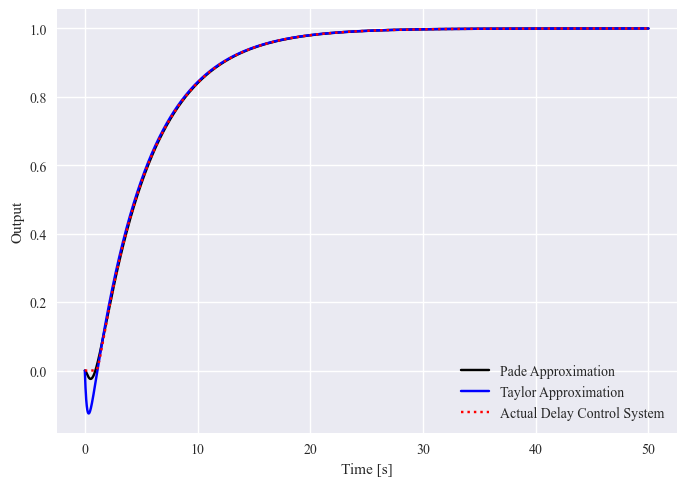

In [9]:
s = ctrl.TransferFunction.s
G = 1 / (s**2 + 5 * s + 1)
theta = 1
D1 = (-0.5 * theta * s + 1) / (0.5 * theta * s + 1)
D2 = 1 - theta * s
G1 = G * D1
G2 = G * D2
T = 50
dt = 0.01
t = np.linspace(0, T, int(T / dt))
f = 0.1
# u = np.sin(2 * t * np.pi * f)
u = np.ones_like(t)
t1, y1 = ctrl.forced_response(G1, T=t, U=u)
t2, y2 = ctrl.forced_response(G2, T=t, U=u)
yt = []
G3 = DelayControlSystem(G, delay_time=theta, dt=dt)
for t_val, u_val in zip(t, u):
    _, y, _ = G3.step(u_val)
    yt.append(y)

plt.plot(t1, y1, "k", label="Pade Approximation")
plt.plot(t2, y2, "b", label="Taylor Approximation")
plt.plot(t, yt, "r:", label="Actual Delay Control System")
plt.xlabel("Time [s]")
plt.ylabel("Output")
plt.legend()
plt.show()

For smaller delay: Taylor Approximation is simpler

For larger delay: Pade Approximation is always better and also reccommended

Analysis: Effect of delay on system performance

1. plot the error between the actual delayed system and the approximated system

e1 = y_actual - y_taylor

e2 = y_actual - y_pade

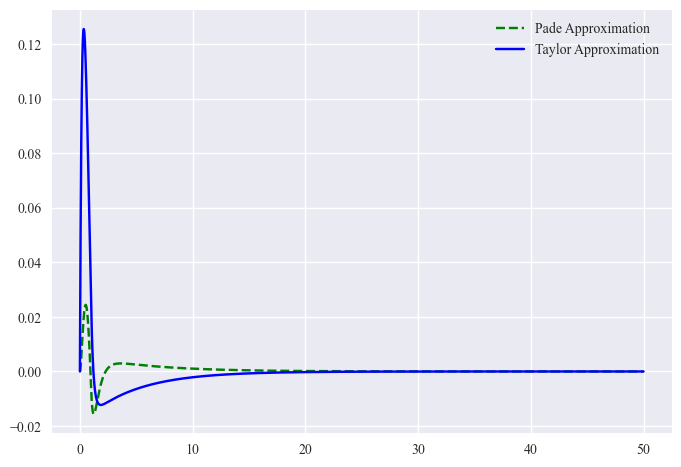

In [7]:
e1 = [(yt[i] - y1[i]) for i in range(len(t))]
e2 = [(yt[i] - y2[i]) for i in range(len(t))]
# plt.plot(G3.t, G3.y, "r:", label="DelayControlSystem")
plt.plot(t1, e1, "g--", label="Pade Approximation")
plt.plot(t2, e2, "b-", label="Taylor Approximation")
# plt.plot(t, u, "--", label="Input")
plt.legend()
plt.show()

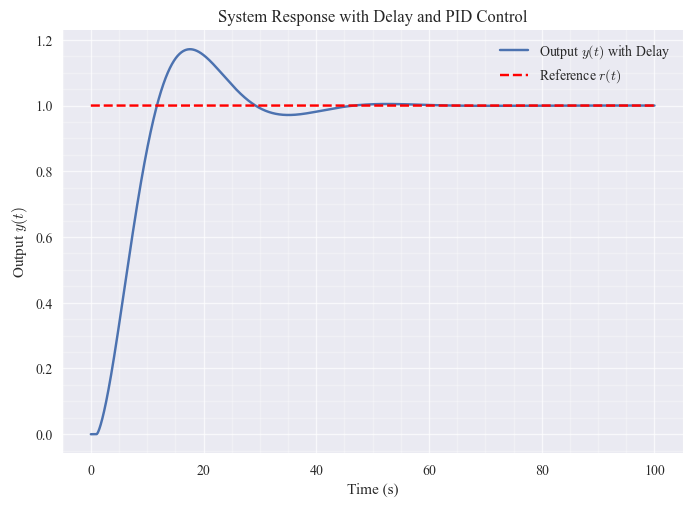

In [8]:
G_delay = DelayControlSystem(G, delay_time=theta, dt=dt)
s = ctrl.TransferFunction.s  # Ensure s is defined as a transfer function variable
C = 0.2 + 0.2 / s
C = DelayControlSystem(C, delay_time=0, dt=dt)
G_delay.reset()
C.reset()
y_T = [0]
T = 100
t_sim = np.linspace(0, T, int(T / dt))
r = np.ones_like(t_sim)

for i, t_i in enumerate(t_sim):
    e = r[i] - y_T[-1]
    _, u_c, _ = C.step(e)
    _, y, _ = G_delay.step(u_c)
    y_T.append(y[0])
plt.plot(t_sim, y_T[1:], label="Output $y(t)$ with Delay")
plt.plot(t_sim, r, "r--", label="Reference $r(t)$")
plt.grid(True, which="minor", alpha=0.3)
plt.grid(True, which="major", alpha=0.7)
plt.xlabel("Time (s)")
plt.minorticks_on()
plt.ylabel("Output $y(t)$")
plt.legend()
plt.title("System Response with Delay and PID Control")
plt.show()